# Rework datasets

## Introduction

In this notebook, we will be downloading and concatinating multiple datasets to form a large dataset to perform our EDA as well as perform ML functions on. The various weather attributes were downloaded from the European Climate Assessment & Dataset (ECA&D) from the year 1979-01-01 to 2022-12-31. The compiled datasets are of a blended series. While most of the data have been observed at a weather station near Heathrow Airport, some have been taken from two nearby locations. The purpose of this notebook is to concatanate a dataset which will be utilized in the "Precipitation in London" notebook.

In [1]:
# Import standard data science & visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

To help clean the data, a supplementary document (noted on seperate word file) was used to clarify any changes and adjustments required for the respective datasets.

# Data dictionary:
- `DATE`: recorded date of measurement
- `CC`: Cloud Cover, measurement in oktas 18 NA
- `HU`: Humidity, measurement in %, 57 NA
- `QQ`: Global Radiation, irradiance measurement in Watt per square meter (W/m2), 25 NA
- `TX`: Temperature Maximum, maximum temperature recorded in degrees Celsius (°C)
- `TG`: Temperature Mean, mean temperature in degrees Celsius (°C), 29 NA
- `TN`: Temperature Minimum, minimum temperature recorded in degrees Celsius (°C)
- `RR`: Precipitation, precipitation measurement in millimeters (mm)
- `PP`: Pressure, pressure measurement in Pascals (hPa), 4 NA
- `SD`: Snow Depth, depth measurement in centimeters (cm), 12 NA & 10 DATES NA, ALSO 32157 rows (includes header)
- `SS`: Sunshine, measurement in hours (hrs)


## CC

In [2]:
# Read in data
cc_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\CC_STAID001860.txt", delimiter=",")

In [3]:
cc_df

,SOUID,DATE,CC,Q_CC
0,116440,19790101,2,0
1,116440,19790102,6,0
2,116440,19790103,5,0
3,116440,19790104,8,0
4,116440,19790105,6,0
...,...,...,...,...
16066,116440,20221227,6,0
16067,116440,20221228,8,0
16068,116440,20221229,4,0
16069,116440,20221230,7,0


In [4]:
cc_df.columns = cc_df.columns.str.strip()

In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   CC      16071 non-null  int64
 3   Q_CC    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [6]:
cc_df2 = cc_df.copy()

In [7]:
cc_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   CC      16071 non-null  int64
 3   Q_CC    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [8]:
columns_to_drop = ['SOUID', 'Q_CC']

In [9]:
cc_df2 = cc_df.drop(columns=columns_to_drop)

In [10]:
cc_df2

,DATE,CC
0,19790101,2
1,19790102,6
2,19790103,5
3,19790104,8
4,19790105,6
...,...,...
16066,20221227,6
16067,20221228,8
16068,20221229,4
16069,20221230,7


In [11]:
cc_df2['DATE'] = pd.to_datetime(cc_df['DATE'], format='%Y%m%d')

In [12]:
cc_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16071 non-null  datetime64[ns]
 1   CC      16071 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 251.2 KB


In [13]:
cc_df2

,DATE,CC
0,1979-01-01,2
1,1979-01-02,6
2,1979-01-03,5
3,1979-01-04,8
4,1979-01-05,6
...,...,...
16066,2022-12-27,6
16067,2022-12-28,8
16068,2022-12-29,4
16069,2022-12-30,7


In [14]:
# Check for missing values
cc_df2.isna().sum()

DATE    0
CC      0
dtype: int64

In [15]:
cc_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = cc_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
CC      0
dtype: int64


In [16]:
unique_values = cc_df2.apply(lambda x: x.unique())
print(unique_values)

DATE    [1979-01-01 00:00:00, 1979-01-02 00:00:00, 197...
CC                   [2, 6, 5, 8, 4, 7, 1, 3, <NA>, 0, 9]
dtype: object


In [17]:
# Check for missing values
cc_df2.isna().sum()

DATE     0
CC      18
dtype: int64

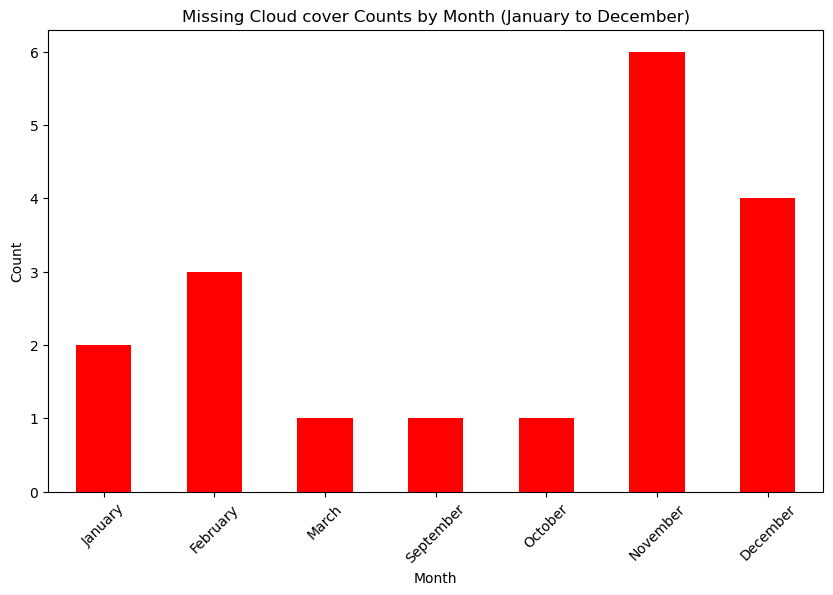

In [18]:
# Let's graph out the missing cloudcover values and group them by month
missing_dates = cc_df2[cc_df2['CC'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing cloudcover per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing cloud cover counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing Cloud cover Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

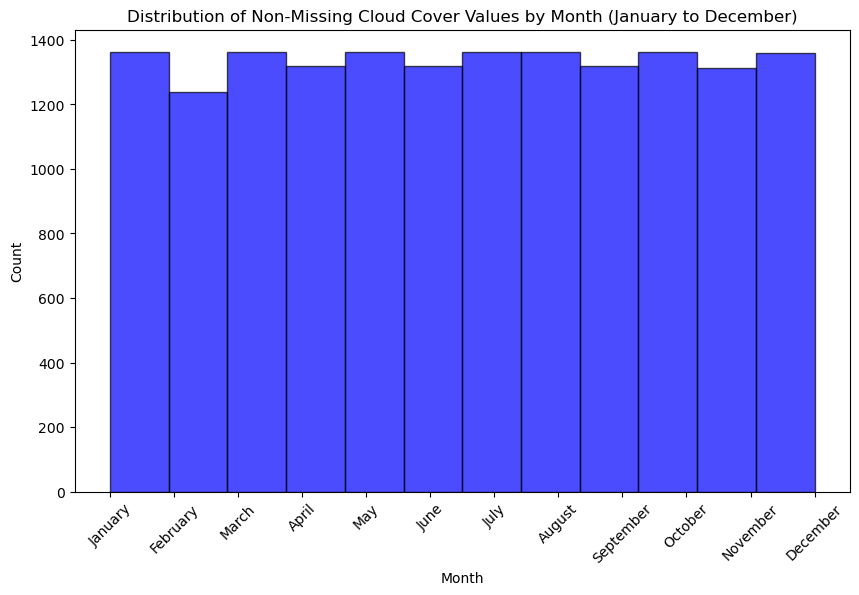

In [19]:
# Filter rows where 'CC' (cloud cover) is not missing
non_missing_dates = cc_df2[cc_df2['CC'].notnull()]['DATE']

# Extract the month component from the date
non_missing_months = non_missing_dates.dt.month

# Plotting distribution of non-missing cloud cover values for each month across all years
plt.figure(figsize=(10, 6))
plt.hist(non_missing_months, bins=12, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Non-Missing Cloud Cover Values by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), list(months_mapping.values()), rotation=45)  # Use month names on x-axis
plt.show()

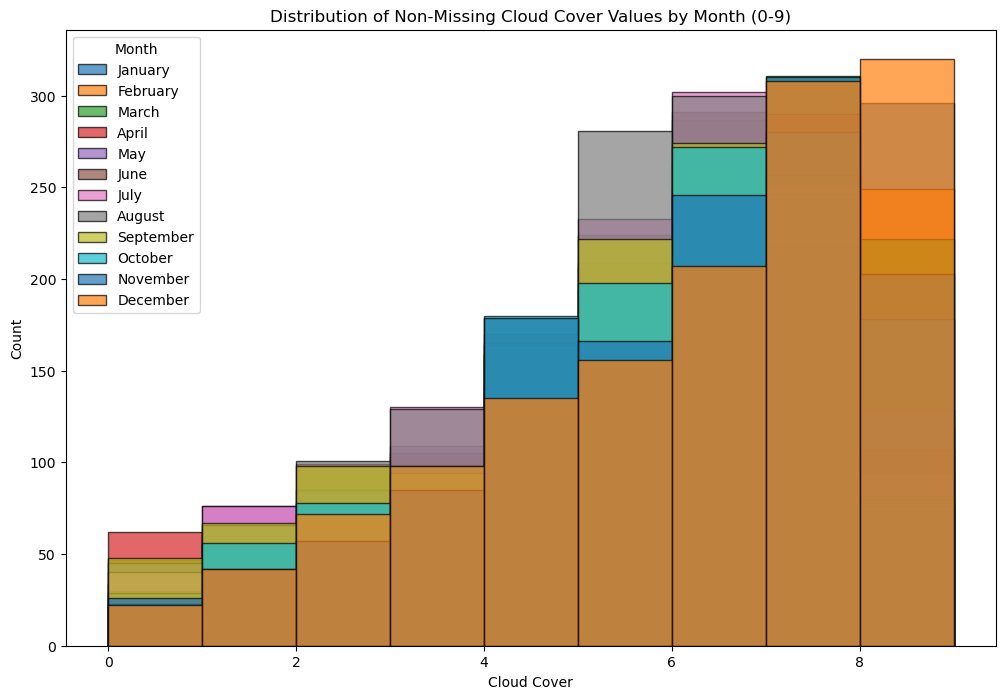

In [20]:
# Filter rows where 'CC' (cloud cover) is not missing
non_missing_data = cc_df2[cc_df2['CC'].notnull()]

# Plotting distribution of non-missing cloud cover values for each month
plt.figure(figsize=(12, 8))
for month in range(1, 13):
    plt.hist(
        non_missing_data[non_missing_data['DATE'].dt.month == month]['CC'],
        bins=range(10),
        alpha=0.7,
        label=months_mapping[month],
        edgecolor='black'
    )

plt.title('Distribution of Non-Missing Cloud Cover Values by Month (0-9)')
plt.xlabel('Cloud Cover')
plt.ylabel('Count')
plt.legend(title='Month')
plt.show()

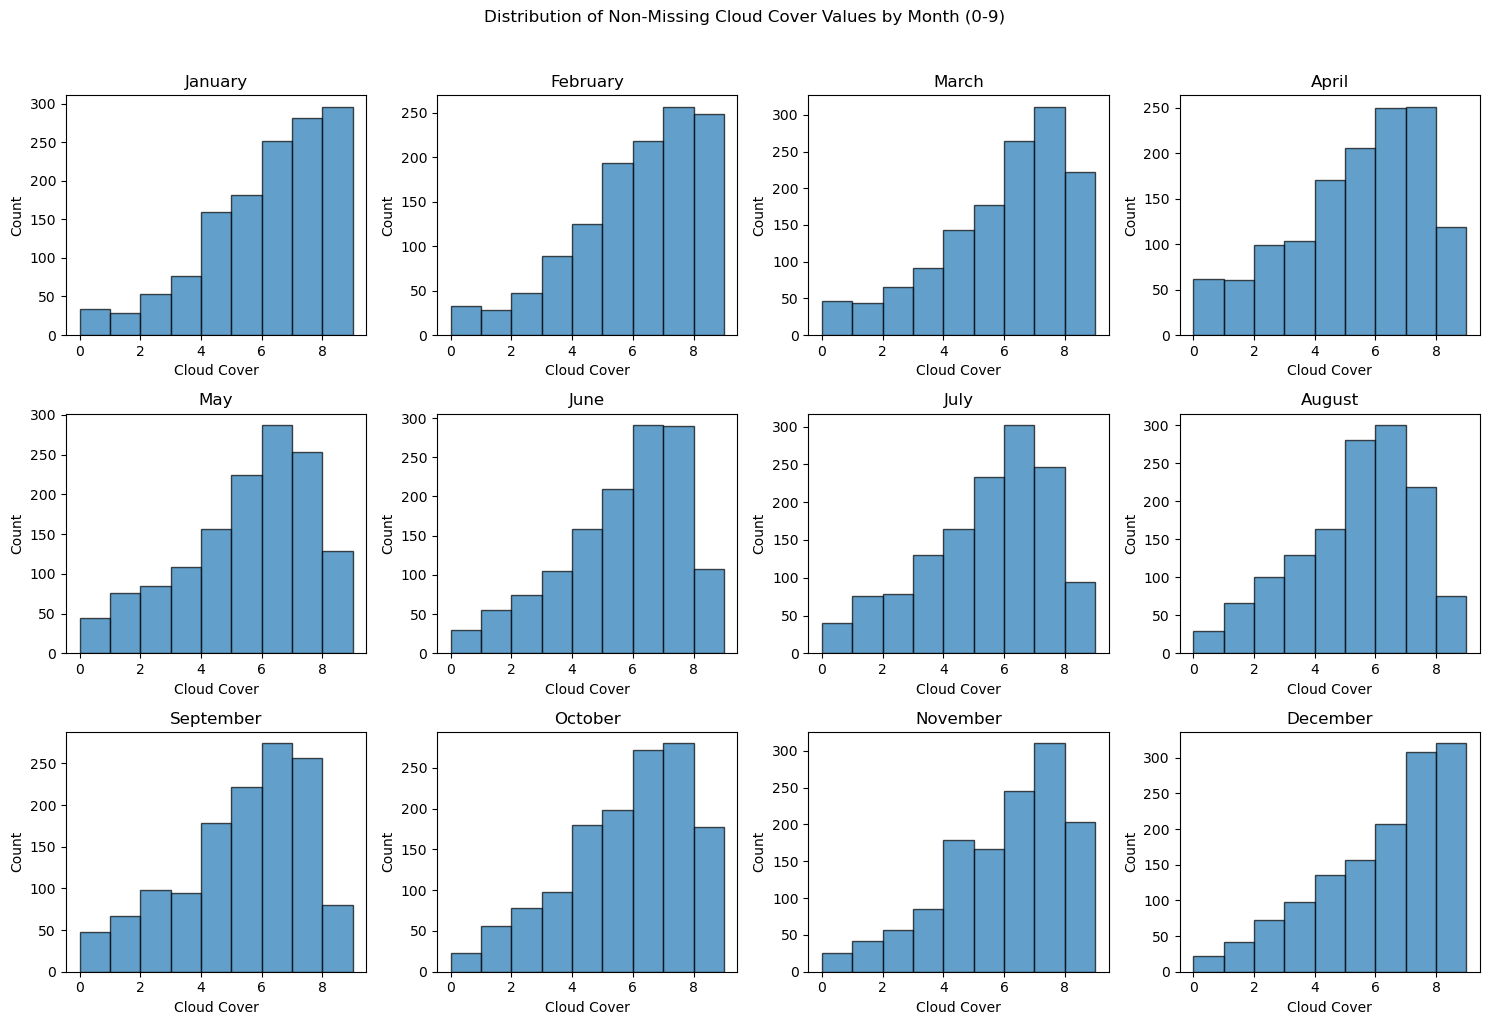

In [21]:
# Filter rows where 'CC' (cloud cover) is not missing
non_missing_data = cc_df2[cc_df2['CC'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Cloud Cover Values by Month (0-9)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['CC']
    ax.hist(data_for_month, bins=range(10), alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Cloud Cover')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

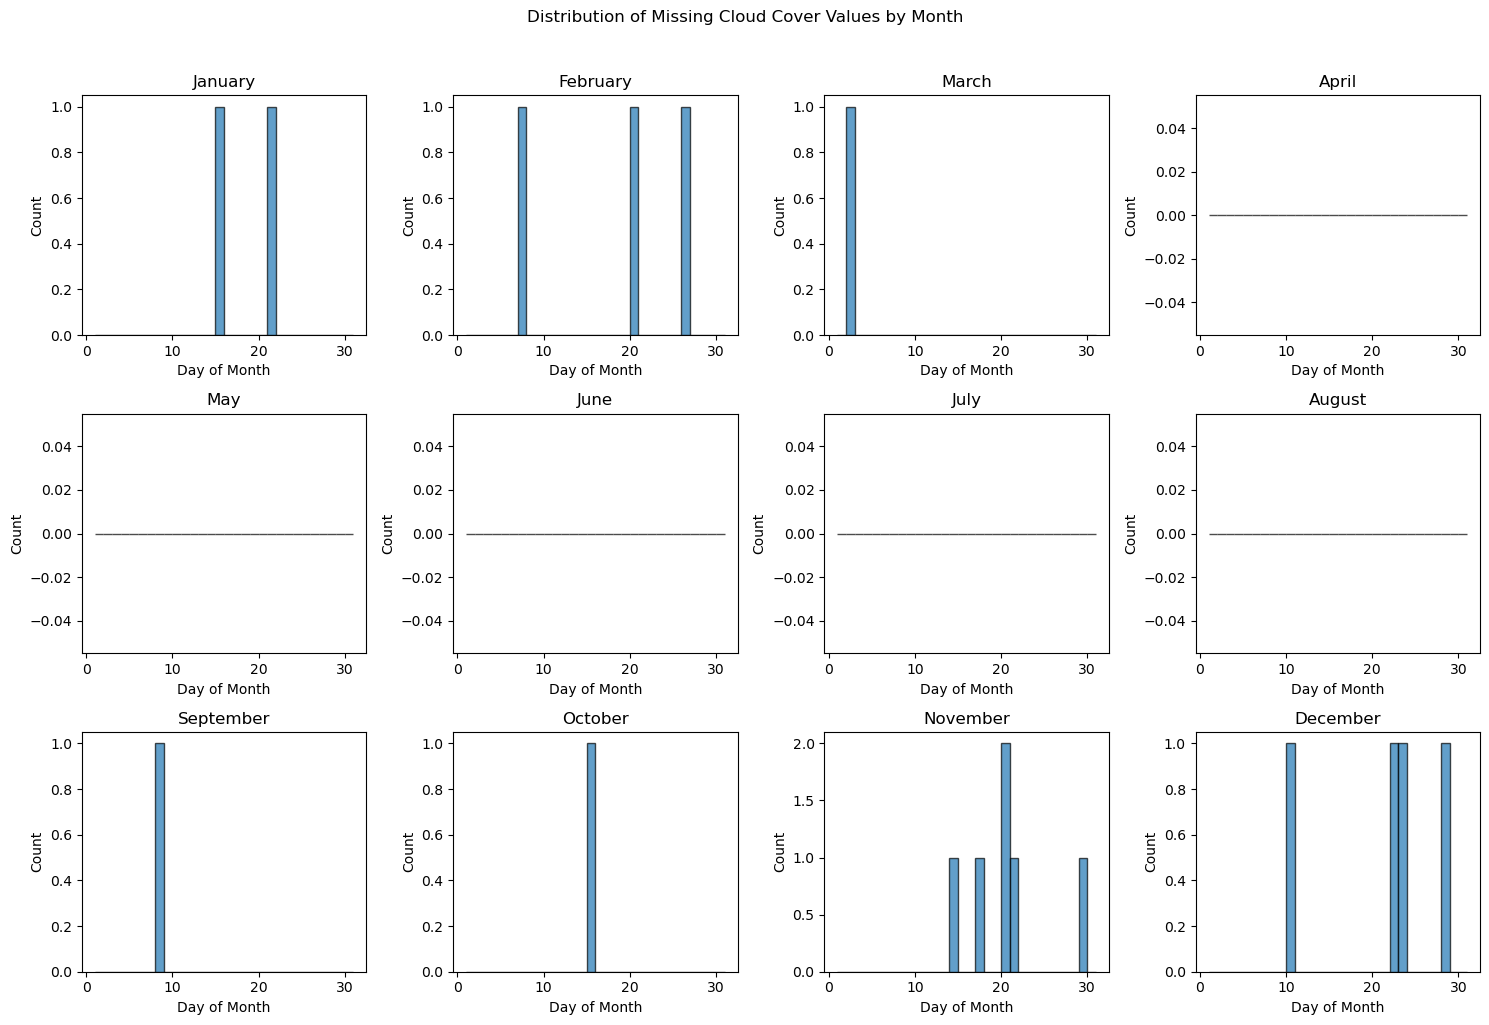

In [22]:
# Filter rows where 'CC' (cloud cover) is missing
missing_data = cc_df2[cc_df2['CC'].isna()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Missing Cloud Cover Values by Month', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    missing_data_for_month = missing_data[missing_data['DATE'].dt.month == month]['DATE']
    ax.hist(missing_data_for_month.dt.day, bins=range(1, 32), alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Day of Month')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [23]:
cc_df2.loc[np.where(cc_df2['DATE'].duplicated())[0]]

,DATE,CC


## HU

In [24]:
# Read in data
hu_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\HU_STAID001860.txt", delimiter=",")

In [25]:
hu_df.head()

,SOUID,DATE,HU,Q_HU
0,116438,19790101,83,0
1,116438,19790102,76,0
2,116438,19790103,86,0
3,116438,19790104,68,0
4,116438,19790105,73,0


In [26]:
hu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    16071 non-null  int64
 1       DATE  16071 non-null  int64
 2      HU     16071 non-null  int64
 3    Q_HU     16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [27]:
hu_df.columns = hu_df.columns.str.strip()

In [28]:
hu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   HU      16071 non-null  int64
 3   Q_HU    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [29]:
hu_df2 = hu_df.copy()

In [30]:
columns_to_drop = ['SOUID', 'Q_HU']

In [31]:
hu_df2 = hu_df.drop(columns=columns_to_drop)

In [32]:
hu_df2['DATE'] = pd.to_datetime(hu_df['DATE'], format='%Y%m%d')

In [33]:
# Check for missing values
hu_df2.isna().sum()

DATE    0
HU      0
dtype: int64

In [34]:
hu_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = hu_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
HU      0
dtype: int64


In [35]:
# Check for missing values
hu_df2.isna().sum()

DATE     0
HU      57
dtype: int64

In [36]:
hu_df2.loc[np.where(hu_df2['DATE'].duplicated())[0]]

,DATE,HU


## QQ

In [37]:
# Read in data
qq_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\QQ_STAID001860.txt", delimiter=",")

In [38]:
qq_df.head()

,SOUID,DATE,QQ,Q_QQ
0,210187,19790101,52,0
1,210187,19790102,27,0
2,210187,19790103,13,0
3,210187,19790104,13,0
4,210187,19790105,29,0


In [39]:
qq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    16071 non-null  int64
 1       DATE  16071 non-null  int64
 2      QQ     16071 non-null  int64
 3    Q_QQ     16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [40]:
qq_df.columns = qq_df.columns.str.strip()

In [41]:
qq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   QQ      16071 non-null  int64
 3   Q_QQ    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [42]:
qq_df2 = qq_df.copy()

In [43]:
columns_to_drop = ['SOUID', 'Q_QQ']

In [44]:
qq_df2 = qq_df.drop(columns=columns_to_drop)

In [45]:
qq_df2['DATE'] = pd.to_datetime(qq_df['DATE'], format='%Y%m%d')

In [46]:
# Check for missing values
qq_df2.isna().sum()

DATE    0
QQ      0
dtype: int64

In [47]:
qq_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = qq_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
QQ      0
dtype: int64


In [48]:
# Check for missing values
qq_df2.isna().sum()

DATE     0
QQ      25
dtype: int64

In [49]:
qq_df2.loc[np.where(qq_df2['DATE'].duplicated())[0]]

,DATE,QQ


## TX

In [50]:
# Read in data
tx_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\TX_STAID001860.txt", delimiter=",")

In [51]:
tx_df.head()

,SOUID,DATE,TX,Q_TX
0,105838,19790101,23,0
1,105838,19790102,16,0
2,105838,19790103,13,0
3,105838,19790104,-3,0
4,105838,19790105,56,0


In [52]:
tx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    16071 non-null  int64
 1       DATE  16071 non-null  int64
 2      TX     16071 non-null  int64
 3    Q_TX     16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [53]:
tx_df.columns = tx_df.columns.str.strip()

In [54]:
tx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   TX      16071 non-null  int64
 3   Q_TX    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [55]:
tx_df2 = tx_df.copy()

In [56]:
columns_to_drop = ['SOUID', 'Q_TX']

In [57]:
tx_df2 = tx_df.drop(columns=columns_to_drop)

In [58]:
tx_df2['DATE'] = pd.to_datetime(tx_df['DATE'], format='%Y%m%d')

In [59]:
# Check for missing values
tx_df2.isna().sum()

DATE    0
TX      0
dtype: int64

In [60]:
tx_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = tx_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
TX      0
dtype: int64


In [61]:
# Check for missing values
tx_df2.isna().sum()

DATE    0
TX      0
dtype: int64

In [62]:
unique_values = tx_df2.apply(lambda x: x.unique())
print(unique_values)

DATE    [1979-01-01 00:00:00, 1979-01-02 00:00:00, 197...
TX      [23, 16, 13, -3, 56, 83, 85, 58, 52, 49, 29, 2...
dtype: object


In [63]:
tx_df2['TX'] = tx_df['TX'] * 0.1

In [64]:
tx_df2

,DATE,TX
0,1979-01-01,2.3
1,1979-01-02,1.6
2,1979-01-03,1.3
3,1979-01-04,-0.3
4,1979-01-05,5.6
...,...,...
16066,2022-12-27,12.0
16067,2022-12-28,9.8
16068,2022-12-29,14.1
16069,2022-12-30,14.0


In [65]:
tx_df2.loc[np.where(tx_df2['DATE'].duplicated())[0]]

,DATE,TX


## TG

In [66]:
# Read in data
tg_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\TG_STAID001860.txt", delimiter=",")

In [67]:
tg_df.head()

,SOUID,DATE,TG,Q_TG
0,107054,19790101,-41,0
1,107054,19790102,-26,0
2,107054,19790103,-28,0
3,107054,19790104,-26,0
4,107054,19790105,-8,0


In [68]:
tg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    16071 non-null  int64
 1       DATE  16071 non-null  int64
 2      TG     16071 non-null  int64
 3    Q_TG     16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [69]:
tg_df.columns = tg_df.columns.str.strip()

In [70]:
tg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   TG      16071 non-null  int64
 3   Q_TG    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [71]:
tg_df2 = tg_df.copy()

In [72]:
columns_to_drop = ['SOUID', 'Q_TG']

In [73]:
tg_df2 = tg_df.drop(columns=columns_to_drop)

In [74]:
tg_df2['DATE'] = pd.to_datetime(tg_df['DATE'], format='%Y%m%d')

In [75]:
# Check for missing values
tg_df2.isna().sum()

DATE    0
TG      0
dtype: int64

In [76]:
tg_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = tg_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
TG      0
dtype: int64


In [77]:
# Check for missing values
tg_df2.isna().sum()

DATE     0
TG      29
dtype: int64

In [78]:
tg_df2['TG'] = tg_df['TG'] * 0.1

In [79]:
tg_df2

,DATE,TG
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
16066,2022-12-27,6.7
16067,2022-12-28,8.8
16068,2022-12-29,8.9
16069,2022-12-30,9.3


In [80]:
tg_df2.loc[np.where(tg_df2['DATE'].duplicated())[0]]

,DATE,TG


## TN

In [81]:
# Read in data
tn_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\TN_STAID001860.txt", delimiter=",")

In [82]:
tn_df.head()

,SOUID,DATE,TN,Q_TN
0,105760,19790101,-75,0
1,105760,19790102,-75,0
2,105760,19790103,-72,0
3,105760,19790104,-65,0
4,105760,19790105,-14,0


In [83]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    16071 non-null  int64
 1       DATE  16071 non-null  int64
 2      TN     16071 non-null  int64
 3    Q_TN     16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [84]:
tn_df.columns = tn_df.columns.str.strip()

In [85]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   TN      16071 non-null  int64
 3   Q_TN    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [86]:
tn_df2 = tn_df.copy()

In [87]:
columns_to_drop = ['SOUID', 'Q_TN']

In [88]:
tn_df2 = tn_df.drop(columns=columns_to_drop)

In [89]:
tn_df2['DATE'] = pd.to_datetime(tn_df['DATE'], format='%Y%m%d')

In [90]:
# Check for missing values
tn_df2.isna().sum()

DATE    0
TN      0
dtype: int64

In [91]:
tn_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = tn_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
TN      0
dtype: int64


In [92]:
# Check for missing values
tn_df2.isna().sum()

DATE    0
TN      0
dtype: int64

In [93]:
tn_df2['TN'] = tn_df['TN'] * 0.1

In [94]:
tn_df2

,DATE,TN
0,1979-01-01,-7.5
1,1979-01-02,-7.5
2,1979-01-03,-7.2
3,1979-01-04,-6.5
4,1979-01-05,-1.4
...,...,...
16066,2022-12-27,1.9
16067,2022-12-28,5.7
16068,2022-12-29,8.1
16069,2022-12-30,4.5


In [95]:
tn_df2.loc[np.where(tn_df2['DATE'].duplicated())[0]]

,DATE,TN


## RR

In [96]:
# Read in data
rr_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\RR_STAID001860.txt", delimiter=",")

In [97]:
rr_df.head()

,SOUID,DATE,RR,Q_RR
0,107650,19790101,4,0
1,107650,19790102,0,0
2,107650,19790103,0,0
3,107650,19790104,0,0
4,107650,19790105,0,0


In [98]:
rr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    16071 non-null  int64
 1       DATE  16071 non-null  int64
 2      RR     16071 non-null  int64
 3    Q_RR     16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [99]:
rr_df.columns = rr_df.columns.str.strip()

In [100]:
rr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   RR      16071 non-null  int64
 3   Q_RR    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [101]:
rr_df2 = rr_df.copy()

In [102]:
columns_to_drop = ['SOUID', 'Q_RR']

In [103]:
rr_df2 = rr_df.drop(columns=columns_to_drop)

In [104]:
rr_df2['DATE'] = pd.to_datetime(rr_df['DATE'], format='%Y%m%d')

In [105]:
# Check for missing values
rr_df2.isna().sum()

DATE    0
RR      0
dtype: int64

In [106]:
rr_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = rr_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
RR      0
dtype: int64


In [107]:
# Check for missing values
rr_df2.isna().sum()

DATE    0
RR      0
dtype: int64

In [108]:
rr_df2['RR'] = rr_df['RR'] * 0.1

In [109]:
rr_df2

,DATE,RR
0,1979-01-01,0.4
1,1979-01-02,0.0
2,1979-01-03,0.0
3,1979-01-04,0.0
4,1979-01-05,0.0
...,...,...
16066,2022-12-27,6.2
16067,2022-12-28,3.6
16068,2022-12-29,0.6
16069,2022-12-30,1.8


In [110]:
rr_df2.loc[np.where(rr_df2['DATE'].duplicated())[0]]

,DATE,RR


## PP

In [111]:
# Read in data
pp_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\PP_STAID001860.txt", delimiter=",")

In [112]:
pp_df.head()

,SOUID,DATE,PP,Q_PP
0,116437,19790101,10190,0
1,116437,19790102,10253,0
2,116437,19790103,10205,0
3,116437,19790104,10084,0
4,116437,19790105,10225,0


In [113]:
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    16071 non-null  int64
 1       DATE  16071 non-null  int64
 2      PP     16071 non-null  int64
 3    Q_PP     16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [114]:
pp_df.columns = pp_df.columns.str.strip()

In [115]:
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   PP      16071 non-null  int64
 3   Q_PP    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [116]:
pp_df2 = pp_df.copy()

In [117]:
columns_to_drop = ['SOUID', 'Q_PP']

In [118]:
pp_df2 = pp_df.drop(columns=columns_to_drop)

In [119]:
pp_df2['DATE'] = pd.to_datetime(pp_df['DATE'], format='%Y%m%d')

In [120]:
# Check for missing values
pp_df2.isna().sum()

DATE    0
PP      0
dtype: int64

In [121]:
pp_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = pp_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
PP      0
dtype: int64


In [122]:
# Check for missing values
pp_df2.isna().sum()

DATE    0
PP      4
dtype: int64

In [123]:
pp_df2['PP'] = pp_df['PP'] * 0.1

In [124]:
pp_df2

,DATE,PP
0,1979-01-01,1019.0
1,1979-01-02,1025.3
2,1979-01-03,1020.5
3,1979-01-04,1008.4
4,1979-01-05,1022.5
...,...,...
16066,2022-12-27,1019.3
16067,2022-12-28,1001.9
16068,2022-12-29,1001.0
16069,2022-12-30,997.1


In [125]:
pp_df2.loc[np.where(pp_df2['DATE'].duplicated())[0]]

,DATE,PP


## SD

In [126]:
# Read in data
sd_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\SD_STAID001860_1.txt", delimiter=",")

In [127]:
sd_df.head()

,SOUID,DATE,SD,Q_SD
0,116436,19790101,9,0
1,116436,19790102,8,0
2,116436,19790103,4,0
3,116436,19790104,2,0
4,116436,19790105,1,0


In [128]:
sd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    16071 non-null  int64
 1       DATE  16071 non-null  int64
 2      SD     16071 non-null  int64
 3    Q_SD     16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [129]:
sd_df.columns = sd_df.columns.str.strip()

In [130]:
sd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   16071 non-null  int64
 1   DATE    16071 non-null  int64
 2   SD      16071 non-null  int64
 3   Q_SD    16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [131]:
sd_df2 = sd_df.copy()

In [132]:
columns_to_drop = ['SOUID', 'Q_SD']

In [133]:
sd_df2 = sd_df.drop(columns=columns_to_drop)

In [134]:
sd_df2['DATE'].loc[16070]

20221231

In [135]:
sd_df2['DATE'] = pd.to_datetime(sd_df['DATE'], format='%Y%m%d')

In [136]:
# Check for missing values
sd_df2.isna().sum()

DATE    0
SD      0
dtype: int64

In [137]:
sd_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = sd_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
SD      0
dtype: int64


In [138]:
# Check for missing values
sd_df2.isna().sum()

DATE       0
SD      1075
dtype: int64

In [139]:
sd_df2.loc[np.where(sd_df2['DATE'].duplicated())[0]]

,DATE,SD


## SS

In [140]:
# Read in data
ss_df = pd.read_csv("C:\\Users\\mitth\\OneDrive\\Desktop\\ECA_blended_custom\\Reworked\\SS_STAID001860.txt", delimiter=",")

In [141]:
ss_df.head()

,SOUID,DATE,SS,Q_SS
0,116439,19790101,70,0
1,116439,19790102,17,0
2,116439,19790103,0,0
3,116439,19790104,0,0
4,116439,19790105,20,0


In [142]:
ss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    16071 non-null  int64
 1       DATE  16071 non-null  int64
 2      SS     16071 non-null  int64
 3    Q_SS     16071 non-null  int64
dtypes: int64(4)
memory usage: 502.3 KB


In [143]:
ss_df.columns = ss_df.columns.str.strip()

In [144]:
ss_df2 = ss_df.copy()

In [145]:
columns_to_drop = ['SOUID', 'Q_SS']

In [146]:
ss_df2 = ss_df.drop(columns=columns_to_drop)

In [147]:
ss_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DATE    16071 non-null  int64
 1   SS      16071 non-null  int64
dtypes: int64(2)
memory usage: 251.2 KB


In [148]:
ss_df2['DATE'] = pd.to_datetime(ss_df['DATE'], format='%Y%m%d')

In [149]:
ss_df2.replace(-9999, pd.NA, inplace=True)

# Count the occurrences of -9999 in each column
missing_counts = ss_df2.eq(-9999).sum()

# Print the counts
print(missing_counts)

DATE    0
SS      0
dtype: int64


In [150]:
# Check for missing values
ss_df2.isna().sum()

DATE    0
SS      0
dtype: int64

In [151]:
ss_df2['SS'] = ss_df['SS'] * 0.1

In [152]:
ss_df2

,DATE,SS
0,1979-01-01,7.0
1,1979-01-02,1.7
2,1979-01-03,0.0
3,1979-01-04,0.0
4,1979-01-05,2.0
...,...,...
16066,2022-12-27,0.5
16067,2022-12-28,0.0
16068,2022-12-29,1.5
16069,2022-12-30,0.1


In [153]:
ss_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16071 non-null  datetime64[ns]
 1   SS      16071 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 251.2 KB


In [154]:
ss_df2.loc[np.where(ss_df2['DATE'].duplicated())[0]]

,DATE,SS


## MERGE
### Combining all the datasets to form one

In [155]:
cc_df3 = cc_df2.copy()

In [156]:
hu_df3 = hu_df2.copy()

In [157]:
qq_df3 = qq_df2.copy()

In [158]:
tx_df3 = tx_df2.copy()

In [159]:
tn_df3 = tn_df2.copy()

In [160]:
tg_df3 = tg_df2.copy()

In [161]:
rr_df3 = rr_df2.copy()

In [162]:
pp_df3 = pp_df2.copy()

In [163]:
sd_df3 = sd_df2.copy()

In [164]:
ss_df3 = ss_df2.copy()

In [165]:
var_df = [cc_df3, hu_df3, qq_df3, tx_df3, tn_df3, tg_df3, rr_df3, pp_df3, sd_df3, ss_df3]

In [166]:
lw_df = pd.concat([df.set_index('DATE') for df in var_df], axis=1, join='inner').reset_index()

In [167]:
lw_df

,DATE,CC,HU,QQ,TX,TN,TG,RR,PP,SD,SS
0,1979-01-01,2,83,52,2.3,-7.5,-4.1,0.4,1019.0,9,7.0
1,1979-01-02,6,76,27,1.6,-7.5,-2.6,0.0,1025.3,8,1.7
2,1979-01-03,5,86,13,1.3,-7.2,-2.8,0.0,1020.5,4,0.0
3,1979-01-04,8,68,13,-0.3,-6.5,-2.6,0.0,1008.4,2,0.0
4,1979-01-05,6,73,29,5.6,-1.4,-0.8,0.0,1022.5,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...
16066,2022-12-27,6,88,18,12.0,1.9,6.7,6.2,1019.3,0,0.5
16067,2022-12-28,8,91,12,9.8,5.7,8.8,3.6,1001.9,0,0.0
16068,2022-12-29,4,76,25,14.1,8.1,8.9,0.6,1001.0,0,1.5
16069,2022-12-30,7,86,14,14.0,4.5,9.3,1.8,997.1,0,0.1


In [168]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16071 non-null  datetime64[ns]
 1   CC      16053 non-null  object        
 2   HU      16014 non-null  object        
 3   QQ      16046 non-null  object        
 4   TX      16071 non-null  float64       
 5   TN      16071 non-null  float64       
 6   TG      16071 non-null  float64       
 7   RR      16071 non-null  float64       
 8   PP      16071 non-null  float64       
 9   SD      14996 non-null  object        
 10  SS      16071 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.3+ MB


#### Converting into csv file 

In [169]:
lw_df.to_csv('C:\\Users\\mitth\\Documents\\Brainstation\\Final_Project\\London_Weather_EDA\\lw_df.csv', index=False)